In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("../data/raw/drugsComTest_raw.tsv", sep="\t").drop("Unnamed: 0", axis=1)

In [3]:
data['review'] = data['review'].str.replace('&#039;',"'",)
data['review'] = data['review'].str.replace('"',"")

In [4]:
data.head()

,drugName,condition,review,rating,date,usefulCount
0,Mirtazapine,Depression,I've tried a few antidepressants over the year...,10.0,"February 28, 2012",22
1,Mesalamine,"Crohn's Disease, Maintenance",My son has Crohn's disease and has done very w...,8.0,"May 17, 2009",17
2,Bactrim,Urinary Tract Infection,Quick reduction of symptoms,9.0,"September 29, 2017",3
3,Contrave,Weight Loss,Contrave combines drugs that were used for alc...,9.0,"March 5, 2017",35
4,Cyclafem 1 / 35,Birth Control,I have been on this birth control for one cycl...,9.0,"October 22, 2015",4


In [5]:
data = data[data['condition'].str.contains("users found this comment helpful") == False]

In [8]:
data.to_csv("../data/raw/drugs_train.csv", index=False)

In [2]:
data_ = pd.read_csv("../data/raw/drugs_train.csv")

# ML

In [3]:
import time
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score



<AxesSubplot:>

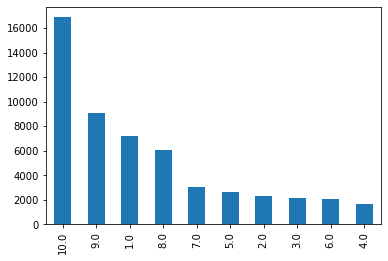

In [4]:
data_["rating"].value_counts().plot.bar()

In [5]:
x = data_['review']
y = data_['rating']

In [6]:
# Feature extractors.
feature_extractors = [
CountVectorizer(),
TfidfVectorizer(),
# Ignore words that appear in less than 20% of posts (rare words).
CountVectorizer(min_df=0.2),
# Ignore words that appear in more than 80% of posts (frequent words).
CountVectorizer(max_df=0.8),
CountVectorizer(ngram_range=(2, 2)),
CountVectorizer(ngram_range=(3, 3)),
TfidfVectorizer(min_df=0.2),
TfidfVectorizer(max_df=0.8),
TfidfVectorizer(ngram_range=(2, 2)),
TfidfVectorizer(ngram_range=(3, 3))
]

# Classifiers.
classifiers = [ 
# LinearSVC(max_iter=100000), 
# LogisticRegression(max_iter=100000),
KNeighborsClassifier(),
RandomForestClassifier(),
DecisionTreeClassifier()
]

In [7]:
cv = StratifiedKFold(n_splits=5)

scoring = {
'f1_score': make_scorer(f1_score, average='weighted')
}

In [8]:
def start_ML_pipeline():
   for classifier in classifiers:
      for extractor in feature_extractors:
         start_time = time.time()
         pipeline = Pipeline([('extractor', extractor), ('classifier', classifier)])
         scores = cross_validate(pipeline, x, y, cv=cv, scoring=scoring)
         end_time = time.time()
         total_time = round((end_time - start_time)/60, 2)
         
         f1_score = round(np.mean(scores['test_f1_score']), 2)
         # precision = round(np.mean(scores['test_precision']), 2)
         # recall = round(np.mean(scores['test_recall']), 2)
         # acc = round(np.mean(scores['test_accuracy']), 2)

         print("Time: ", total_time, " min")
         print("Experiment: ", str(classifier), "+", str(extractor))
         print("F1 score= ", f1_score, ", 5-fold CV=", scores['test_f1_score'])
         # print("Precision= ", precision, ", 5-fold CV=", scores['test_precision'])
         # print("Recall= ", recall, ", 5-fold CV=", scores['test_recall'])
         # print("Accuracy= ", acc, ", 5-fold CV=", scores['test_accuracy'])
         print("="*100)

In [9]:
start_ML_pipeline()

Time:  2.4  min
Experiment:  KNeighborsClassifier() + CountVectorizer()
F1 score=  0.27 , 5-fold CV= [0.26361946 0.27027045 0.27048944 0.26197343 0.26152161]
Time:  2.6  min
Experiment:  KNeighborsClassifier() + TfidfVectorizer()
F1 score=  0.16 , 5-fold CV= [0.17726861 0.28946683 0.10340398 0.10638595 0.10489489]
Time:  2.26  min
Experiment:  KNeighborsClassifier() + CountVectorizer(min_df=0.2)
F1 score=  0.24 , 5-fold CV= [0.23805374 0.23830331 0.23372506 0.2402046  0.24440951]
Time:  2.65  min
Experiment:  KNeighborsClassifier() + CountVectorizer(max_df=0.8)
F1 score=  0.27 , 5-fold CV= [0.26912451 0.26814606 0.26581393 0.26476887 0.27014402]
Time:  1.57  min
Experiment:  KNeighborsClassifier() + CountVectorizer(ngram_range=(2, 2))
F1 score=  0.24 , 5-fold CV= [0.2388884  0.23059689 0.24783955 0.23495498 0.23797525]
Time:  1.5  min
Experiment:  KNeighborsClassifier() + CountVectorizer(ngram_range=(3, 3))
F1 score=  0.23 , 5-fold CV= [0.2336527  0.22406546 0.22824923 0.22160486 0.226